# Lecture 10 - Matplotlib
## (and some more Numpy and Pandas)

[Matplotlib](https://matplotlib.org/) is a library for visualisation and plotting with Python and [NumPy](https://numpy.org/doc/stable/). In some respects, it has been inspired by Matlab (but has since moved away towards more Python-esque ways...).

We are going to be looking at plotting functions, visualising the relationships between features of a dataset, and show how we can add images to our visualisations (for this, you need to download the _iris-virginica.jpg_ file from blackboard). Finally, we also discuss the summarised results of the ICT (for this, you need to download the _ict.csv_ file from blackboard).

We demonstrate the following visualisation capabilities:
- [1D functions (2D data)](#1D-functions-(2D-data))
    - [Plotting functions](#Plotting-functions)
    - [Plotting data](#Plotting-data)
    - [Functions from data](#Functions-from-data)
        - [Approximating data](#Approximating-data)
        - [Interpolating data](#Interpolating-data)
- [1D data](#1D-data)
    - [Histogram](#Histogram)
    - [Axes](#Axes)
    - [Boxplot](#Boxplot)
- [3D data (2D functions)](#3D-data-(2D-functions))
    - [Images](#Images)
    - [Tabular data](#Tabular-data)
    - [2D functions](#2D-functions)
- [ICT summary](#ICT-summary)
    - [Per question analysis](#Per-question-analysis)
        - [Loops (fizzbuz)](#Loops-(fizzbuz))
        - [Recursion](#Recursion)
        - [Reading from a file](#Nested-if-statements)

In [1]:
import numpy as np

## 1D functions (2D data)

While the cell above `import`s the whole NumPy library, Matplotlib is typically imported module-by-module. Additionally, those modules are typically given an _alias_:

In [2]:
from matplotlib import pyplot as plt

The short-hand form is more common:

In [3]:
import matplotlib.pyplot as plt

#### Mini-revision

Can you remember what [`numpy.linspace()`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) function does?

In [4]:
print(np.linspace(0, 10, 11))

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


Also, remember that we can apply mathematical functions to the whole of an array:

In [5]:
array = np.linspace(0, 10, 11)
array *=2
print(array)

[ 0.  2.  4.  6.  8. 10. 12. 14. 16. 18. 20.]


### Plotting functions

While Matplotlib can be used to plot functions, those functions are actually rendered from a list of data points. Plotting a sine wave actually corresponds to calculating all the values of the function for really close values of x, and plotting a connected line between those.

For plotting the values `y` against their locations `x`, we can use [`matplotlib.pyplot.plot()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html). The basic notation is as follows:
> `matplotlib.pyplot.plot(x, y)`
>
> Displays a plot on the current figure or axis of values of `y` plotted against their locations `x`. The data points are connected by straight lines. (`x` and `y` should be of the same length)

_Note:_ Notice how the function gets more patchy as we change the number of values which we calculate and display!

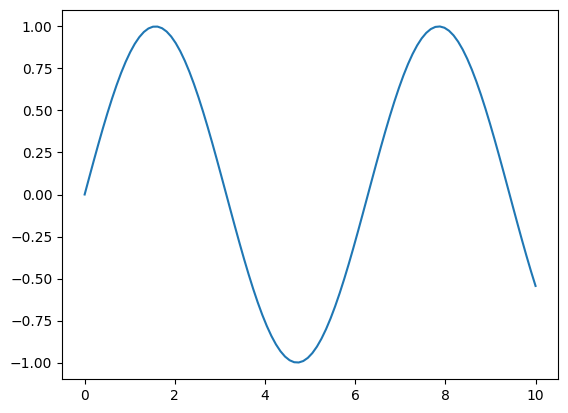

In [6]:
min_x = 0
max_x = 10

# change 100 to a different (smaller) value:
display_values = np.linspace(min_x, max_x, 100)

plt.plot(display_values, np.sin(display_values))

plt.show()

We can use [`matplotlib.pyplot.plot()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html) to plot more than one graph onto our image.

The following example showcases plotting both the functions $\sin(x)$ and $\cos(x)$ on an interval (0, 5).

We also demonstrate the interplay between:
- argument `label` of [`matplotlib.pyplot.plot()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html): the label assigned to the current graph being plotted
- [`matplotlib.pyplot.legend()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html): displays all the labels assigned to all the graphs on the figure (or axis)

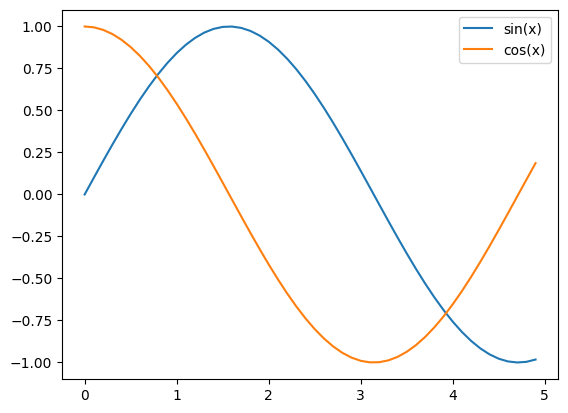

In [7]:
min_x = 0
max_x = 5
display_values = np.arange(min_x, max_x, 0.1)

plt.plot(display_values, np.sin(display_values), label = 'sin(x)')
plt.plot(display_values, np.cos(display_values), label = 'cos(x)')
plt.legend()

plt.show()

The next example plots a more complex function. It also shows some additional arguments of [`matplotlib.pyplot.plot()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html), as well as some additional methods in [`matplotlib.pyplot`](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html) module.

Arguments of [`matplotlib.pyplot.plot()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html):
- `label`: (seen above) the label assigned to the current graph being plotted
- `color`: the color of the current graph
- `linewidth`: width of the line used for the current graph
- `linestyle`: style of the line

Additional methods of [`matplotlib.pyplot`](https://matplotlib.org/3.5.3/api/_as_gen/matplotlib.pyplot.html) which you can use to make your figure nicer:
- [`matplotlib.pyplot.legend()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.legend.html) (seen above) displays all the labels assigned to all the graphs on the figure (or axis)
- [`matplotlib.pyplot.grid()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.grid.html): adds a grid over the graph (lines at all the major "ticks": see next)
- [`matplotlib.pyplot.yticks()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.yticks.html) (and [`matplotlib.pyplot.xticks()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xticks.html) - not shown): sets fixed "ticks" on the y-axis
- [`matplotlib.pyplot.xlabel()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html) and [`matplotlib.pyplot.ylabel()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.xlabel.html): sets a label (name) for the x and y axis
- [`matplotlib.pyplot.title()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.title.html): sets a title for the whole figure

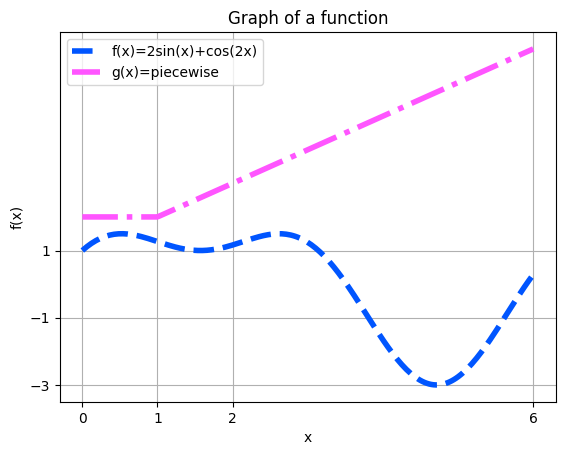

In [8]:
def f(x):
    return 2*np.sin(x) + np.cos(2*x)

def g(x):
    if x < 1:
        return 2
    else:
        return x+1

dense_values = np.linspace(0, 6, 200)

plt.plot(dense_values, list(map(f,dense_values)), label = 'f(x)=2sin(x)+cos(2x)',
         c = '#0055FF', lw=4, ls='--')
plt.plot(dense_values, list(map(g,dense_values)), label = 'g(x)=piecewise',
         c = '#FF55FF', lw=4, ls='-.')

plt.legend()
plt.grid()
plt.yticks([-3, -1, 1])
plt.xticks([0,1,2,6])
plt.xlabel("x")
plt.ylabel("f(x)")
plt.title("Graph of a function")

plt.show()

### Plotting data

But, how do we _obtain_ a function approximation from the data?

Our data rarely contains dense samples from a timeseries (like in the examples above). More commonly, the data is just given as a series of samples, with features associated to each sample. Often, we do not want to plot a line between each of our samples, we just want to visualise the samples themselves.

For this, instead of [`matplotlib.pyplot.plot()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html), we can use [`matplotlib.pyplot.scatter()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html). The basic notation is as follows:
> `matplotlib.pyplot.scatter(x, y)`
> 
> Displays a scatter graph on the current figure of the data points located at locations `x[i]` and `y[i]` for every element of `x` and `y`. (`x` and `y` should be of the same length)

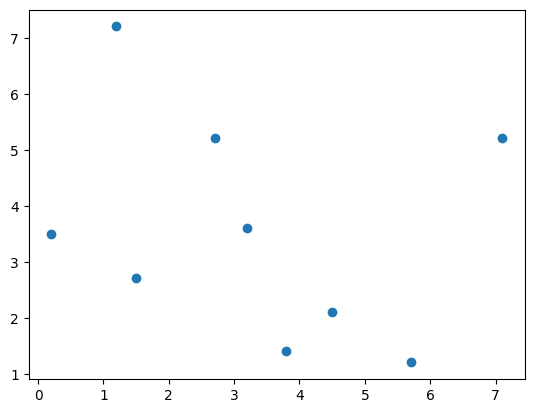

In [9]:
x = [0.2, 1.5, 2.7, 1.2, 3.8, 7.1, 4.5, 3.2, 5.7] # features
y = [3.5, 2.7, 5.2, 7.2, 1.4, 5.2, 2.1, 3.6, 1.2] # targets

plt.scatter(x, y)

plt.show()

### Functions from data

#### Approximating data

Let us demonstrate two different ways to obtain function approximations of our data. First, let us plot some new data points from an [`numpy.array`](https://numpy.org/doc/stable/reference/generated/numpy.array.html).

We also demonstrate a new argument of [`matplotlib.pyplot.scatter()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html):
- `marker`: the type of marker used to display the data points (this argument can also be used for  [`matplotlib.pyplot.plot()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html))

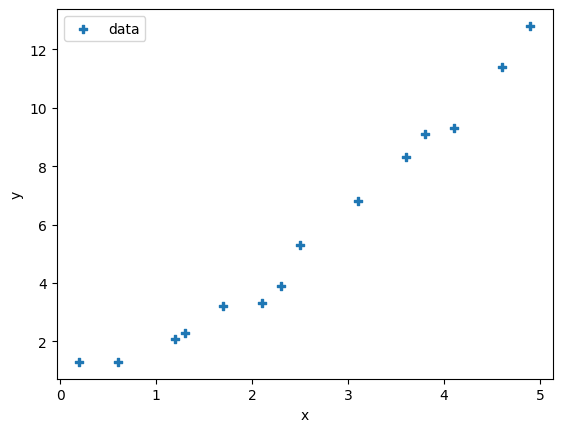

In [10]:
data = np.array([[1.2, 2.1],
                 [2.5, 5.3],
                 [0.2, 1.3],
                 [3.1, 6.8],
                 [2.3, 3.9],
                 [4.1, 9.3],
                 [3.6, 8.3],
                 [4.9, 12.8],
                 [2.1, 3.3],
                 [1.3, 2.3],
                 [0.6, 1.3],
                 [1.7, 3.2],
                 [3.8, 9.1],
                 [4.6, 11.4]])

plt.scatter(data[:, 0], data[:, 1], label = 'data', marker = 'P')

plt.xlabel("x")
plt.ylabel("y")
plt.legend()

plt.show()

This data looks like it may be well approximated with a straight line. To calculate a line approximation from a number of data samples, you can use **linear regression**.

For this, we can use Numpy method [`numpy.polyfit()`](https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html):

> `numpy.polyfit(x, y, deg)`
>
> Fit a polynomial of degree _deg_ to points (x, y). 
>
>  **Parameters:**
> 
>    `x` array_like, shape (M,)
>
>       x-coordinates of the M sample points
> 
>    `y` array_like, shape (M,)
>
>       y-coordinates of the M sample points
>
>   `deg` int
>
>       Degree of the fitting polynomial
>
>    **Returns**: Returns a vector of coefficients p that minimises the squared error in the order deg, deg-1, … 0.
>
>    `p` ndarray, shape (deg + 1,) 
>
>       Polynomial coefficients, highest power first.

This method can approximate the data not only with a line, but also with a higher order polynomial. When we use **a line to estimate the data**, the two coefficients returned by this method are _slope_ and _intercept_ of the line with the equation $y = \texttt{slope} \times x + \texttt{intercept}$.

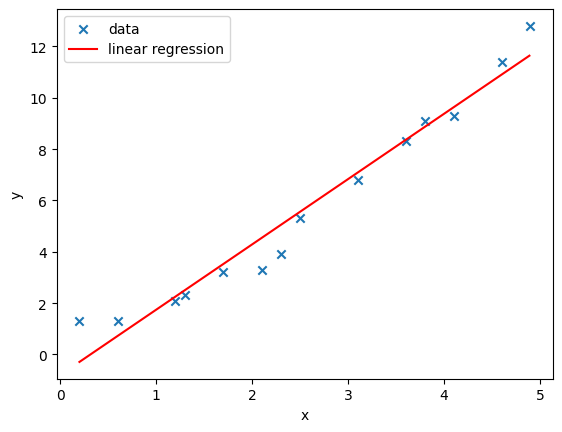

In [11]:
plt.scatter(data[:, 0], data[:, 1], label = 'data', marker='x')

min_x, min_y = np.min(data, axis=0)
max_x, max_y = np.max(data, axis=0)

xs = np.arange(min_x, max_x, 0.01)
slope, intercept = np.polyfit(data[:, 0], data[:, 1], 1)

plt.plot(xs, intercept + slope*xs, color='r', label = 'linear regression')

plt.xlabel("x")
plt.ylabel("y")
plt.legend()

plt.show()

Instead of fitting a straight line, you can fit any polynomial to the data. A polynomial of degree $n$ has the form:
$$
f(x) = p_nx^n + p_{n-1}x^{n-1}+\dotsc+p_{1}x+p_0
$$

Let us try and fit a _quadratic_ function $f(x) = ax^2 + bx + c$ to the data. This means, that for the set of data points $\mathbf{x} = \{x_i\}$, $\mathbf{y} = \{y_i\}$, we will try and find the coefficients (parameters) $a, b, c$.

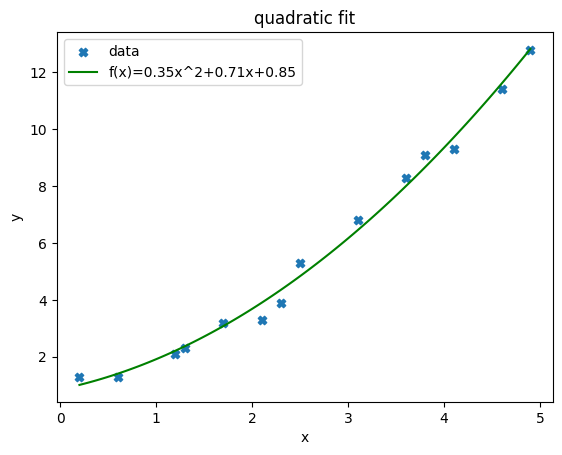

In [12]:
# scatter plot our original data
plt.scatter(data[:, 0], data[:, 1], marker='X', label = 'data')

# find min and max for calculating the fitted values
min_x, _ = np.min(data, axis=0)
max_x, _ = np.max(data, axis=0)

# fit the quadratic function to our data:
a, b, c = np.polyfit(data[:, 0], data[:, 1], 2)
# get dense values of x to display a smooth approximation
xs = np.linspace(min_x, max_x, 100)

def f_quadratic(a, b, c, xs):
    return a*xs*xs + b*xs + c

# finally, plot the quadratic fit:
plt.plot(xs, f_quadratic(a,b,c,xs), color = 'g', label = 'f(x)={:.2f}x^2+{:.2f}x+{:.2f}'.format(a, b, c))

plt.xlabel("x")
plt.ylabel("y")
plt.title("quadratic fit")
plt.legend()

plt.show()

#### Interpolating data

The above examples show obtaining a function approximation from data (samples) using _approximation_. This method is typical when we are looking at a relationship between two features without considering changes in time. For example:
- `x` might be average household income,
- `y` might be the value of their average weekly grocery shopping,
- on every income level, some people are buying more, and some less ("conflicting data");
- but we are looking for general _trends_ in the data. 

However, sometimes our points come from a _sparsely sampled time series_. For example, we might measure _temperature_ once an hour, and want to describe the change in temperature over the course of two days. Or, we might measure the _water level_ of a river four times a day, and want to know how the water level changed over a month.

So, let us first sparsely sample some data points from one of our earlier functions.

To ensure repeatability of our code, we initialised a _random number generator_ with [`numpy.random.default_rng(seed)`](https://numpy.org/doc/stable/reference/random/generator.html). Then, to draw evenly distributed samples from a range (`min`, `max`), we used [`numpy.random.Generator.uniform(min, max, size)`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.uniform.html).

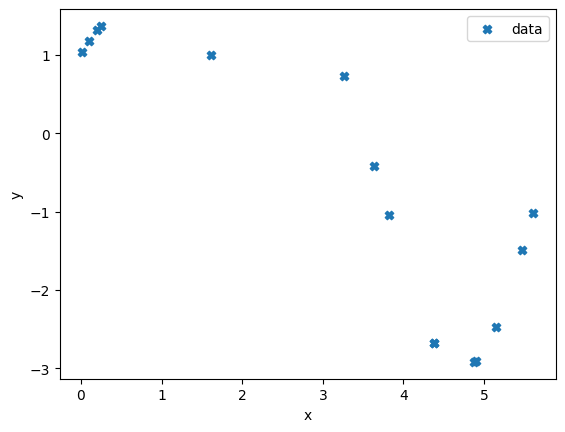

In [13]:
def f(x):
    return 2*np.sin(x) + np.cos(2*x)

min_x = 0
max_x = 6

# initialise random number generator
rng = np.random.default_rng(0)
# get 15 sparse points from the interval [0, 6]
sparse_x = np.sort(rng.uniform(min_x, max_x, size = 15))
sparse_y = f(sparse_x)

# show the sparse points as data with scatter
plt.scatter(sparse_x, sparse_y, label='data', marker = 'X')

# correct the min_x and max_x for later approximations
min_x = np.amin(sparse_x)
max_x = np.amax(sparse_x)
# get dense points for plotting the underlying function
dense_x = np.linspace(min_x, max_x, 100)
dense_y = f(dense_x)

# show the underlying continous function with plot
#plt.plot(dense_x, dense_y, linewidth = 1, color = 'black', label = 'f(x)')

plt.xlabel("x")
plt.ylabel("y")
plt.legend()
                      
plt.show()

And now, let us try and _interpolate_ the underlying function from the available data points. For this, we can use [`numpy.interp()`](https://numpy.org/doc/stable/reference/generated/numpy.interp.html):
>
> `numpy.interp(x_interpolated, x, y)`
>
> Perform a linear interpolation of the 1D function y=f(x) from the data points given in `x` and `y` (sparse sampling of the function), and return the _y_ values of this function for positions provided in `x_interpolated`
>
> **Returns**: `y_interpolated` An array for interpolated values corresponding to `x_interpolated`

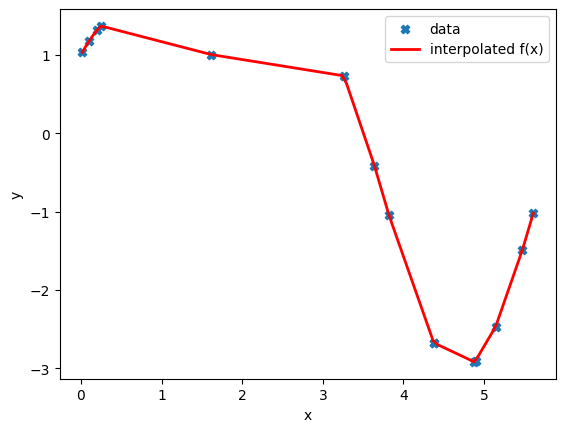

In [14]:
from scipy import interpolate

# show the sparse points as data with scatter
plt.scatter(sparse_x, sparse_y, label='data', marker = 'X')

# show the underlying continous function with plot
# plt.plot(dense_x, dense_y, linewidth = 1, color = 'black', label = 'f(x)')

# calculate the interpolated values for dense points 
dense_y_inter = np.interp(dense_x, sparse_x, sparse_y)

#plot the interpolated function:
plt.plot(dense_x, dense_y_inter, linewidth=2, color = 'r', label = 'interpolated f(x)')

plt.xlabel("x")
plt.ylabel("y")
plt.legend()

plt.show()

## 1D data

What if we want to examine the value of just a single feature of some sample? For example, we might be measuring the _temperature_ of a healthy human body, or _crop yield per hectare_ of different farms.

We are usually interested in the _distribution_ of a feature. This time, we will show how to _visualise_ the distribution. Next time, we will show how to formally check a dataset has been drawn from a normal distribution (so we can compare our intuition with the results of a statistical test).

### Histogram


To do this, we could display a _histogram_ of the data. To do this, we can use [`matplotlib.pyplot.hist()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) with the basic notation as follows:
>
> `matplotlib.pyplot.hist(x, bins)`
>
> Displays a plot on the current figure or axis the histogram of the values in `x` binned in `bins` number of bins. `bins` can also contain the bin limits (as shown in the new example).

You can also see the use of an optional argument `facecolor` which serves to chose the histogram color. Finally, to draw our data from a normal distribution, we used [`numpy.random.Generator.normal(mean, sigma, size)`](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html) after fixing a random number generator.

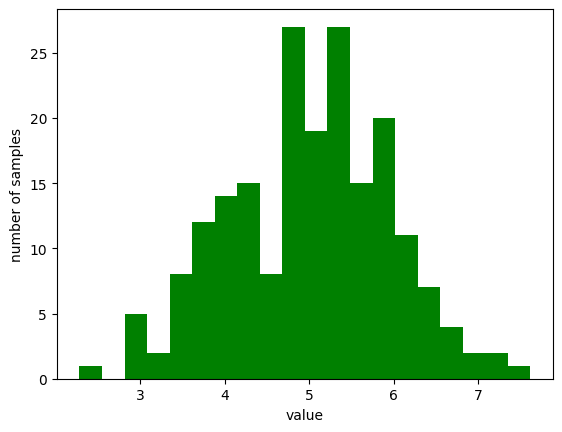

In [15]:
rng = np.random.default_rng(12345)

data = rng.normal(5, 1, size = 200)

n, bins, patches = plt.hist(data, bins=20, facecolor='g')

plt.xlabel('value')
plt.ylabel('number of samples')
    
plt.show()

### Axes

Let us now show how we can visually _compare_ two distributions. For example, we may be looking at the times diners come into a restaurant to eat on a weekday, and on a weekend day. This might also mean that we have a different number of samples from each distribution.

This example requires us to split our figure into _subplots_. This requires us to work with _figures_ and _axis_. This is actually a preferred way of using Matplotlib (even for a single figure), as it allows more flexibility as you move on to advanced functionality. You can think of _axis_ as individual plots in a multi-plot figure.

This requires us to call [`matplotlib.pyplot.subplots()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html):
>
> `matplotlib.pyplot.subplots(nrows=1, ncols=1, sharex=False, sharey=False)`
>
> Returns:
> 
>    `fig` ([`matplotlib.figure.Figure`](https://matplotlib.org/stable/api/figure_api.html#matplotlib.figure.Figure))
>        The figure object.
>
>    `ax` ([`matplotlib.axes.Axes`](https://matplotlib.org/stable/api/axes_api.html#matplotlib.axes.Axes) or array of `Axes`)
>        A single axis or an array of axes if more subplots were created.

Most plotting functions (`plot`, `scatter`, `hist`) work the same as member methods of the [`matplotlib.axes.Axes`](https://matplotlib.org/stable/api/axes_api.html#matplotlib.axes.Axes) object. However, various elements (`xlabel`, `xtics`...) are usually set with _setter_ methods on the `Axes` object (`set_xlabel`, `set_xticks`).

We will try and plot _two_ histograms (similar to the above), each on it's own [`matplotlib.axes.Axes`](https://matplotlib.org/stable/api/axes_api.html#matplotlib.axes.Axes). We will use a shared scale in the x-dimension (`sharex=True`), and show how to re-use the bins from one histogram to another. For this, we are using additional arguments of [`matplotlib.axes.Axes.hist()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.hist.html):
- `range`: a touple `(min, max)` setting the lower and upper limits of histogram bins
- `bins`: in addition to passing a number of bins (20), we can use it to pass _bin limits_ (as returned by the call to the `hist()` function)
- `density`: if `False`, the number of samples in each bin is plotted. If `True`, the proportion of the samples in that bin is plotted instead.

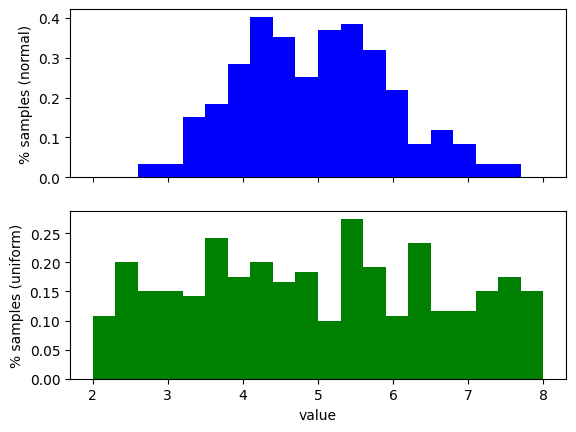

In [16]:
data_normal = rng.normal(5, 1, size = 200)
data_uniform = rng.uniform(2, 8, size = 400)

fig, axs = plt.subplots(2, 1, sharex = True)
min_x = 2
max_x = 8

n0, bins0, patches0 = axs[0].hist(data_normal,
                            bins=20, range=(min_x, max_x), density=True, facecolor='b')
axs[0].set_ylabel('% samples (normal)')

n1, bins1, patches1 = axs[1].hist(data_uniform,
                            bins=bins0, density=True, facecolor='g')
axs[1].set_ylabel('% samples (uniform)')
axs[1].set_xlabel('value')
#axs[1].set_xticks([0, 1, 5])
                                     
plt.show()

### Boxplot

A different way to summarise 1D data is through a _boxplot_. While not as informative as a histogram, it shows the main information quickly: the _mean_ of the samples (orange line), the _variance_ (end of the box), and the _outliers_ (single samples). For this, we can use [`matplotlib.axes.Axes.boxplot()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.boxplot.html):
>
> `matplotlib.axes.Axes.boxplot(x, labels, vert=True)`
>
> Displays a plot on the current axis of the boxplot the values in `x`. If `x` is a list of lists/arrays, displays a boxplot of each list separately. `labels` are used to label the boxplots. Orientation is vertical if `vert=True`, horizontal otherwise.

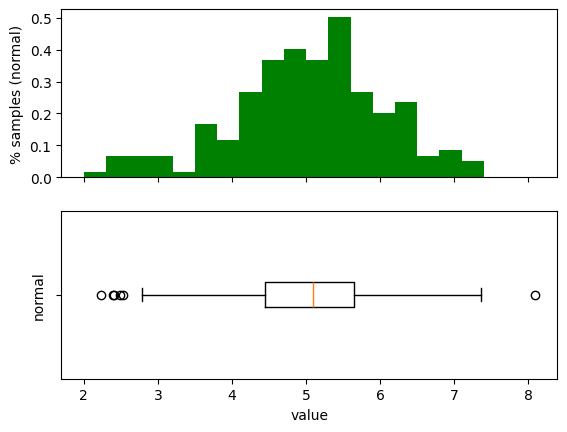

In [17]:
data_normal = rng.normal(5, 1, size = 200)

fig, axs = plt.subplots(2, 1, sharex = True)

min_x = 2
max_x = 8

n0, bins0, patches0 = axs[0].hist(data_normal,
                            bins=20, range=(min_x, max_x), density=True, facecolor='g')
axs[0].set_ylabel('% samples (normal)')

axs[1].boxplot(data_normal, labels = [''], vert = False)
axs[1].set_ylabel('normal')

axs[1].set_xlabel('value')
                                     
plt.show()

If we want to compare different distributions (for different labels in our dataset -- i.e. the average temperature of healthy people compared to the average temperature of people with a cold), we could plot many individual histograms (like the example above), but this gets problematic for a lot of different labels.

Instead, we can use a boxplot to quickly compare different distributions:

_Note:_ We are here using [`matplotlib.pyplot.subplots()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.subplots.html) to crease a single [`matplotlib.axes.Axes`](https://matplotlib.org/stable/api/axes_api.html#matplotlib.axes.Axes) object and a single plot.

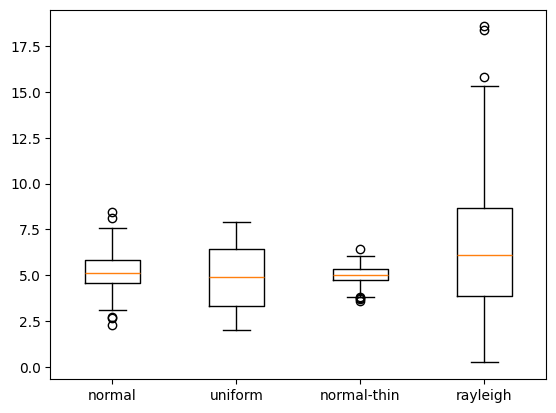

In [18]:
fig, ax = plt.subplots()

data = [rng.normal(5, 1, size = 200),
        rng.uniform(2, 8, size = 200),
        rng.normal(5, 0.5, size = 200),
        rng.rayleigh(5, size = 200)]

labels = ['normal', 'uniform', 'normal-thin', 'rayleigh']

ax.boxplot(data, labels = labels)

plt.show()

## 3D data (2D functions)

Finally, we show how to visualise 3D data, or 2D functions $z=f(x,y)$.

### Images

The simplest way to show a 2D function with Matplotlib is with [`matplotlib.axes.Axes.imshow()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.imshow.html). This can be used to display a colour or grayscale image on an [`matplotlib.axes.Axes`](https://matplotlib.org/stable/api/axes_api.html#matplotlib.axes.Axes).

To read an image, we will use [`matplotlib.pyplot.imread()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imread.html) (you have to download the image from Blacboard to use it).

We will create three [`matplotlib.axes.Axes`](https://matplotlib.org/stable/api/axes_api.html#matplotlib.axes.Axes) and display:
- the original colour image,
- the blue channel of the image,
- the blue channel of the image, rotated by 90$^\circ$. For this we will use [`numpy.rot90(image)`](https://numpy.org/doc/stable/reference/generated/numpy.rot90.html)

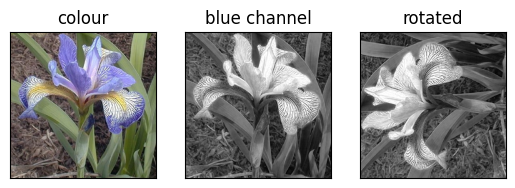

In [19]:
fig, ax = plt.subplots(1, 3)

img=plt.imread('iris-virginica.jpg')

imgplot = ax[0].imshow(img)
ax[0].set_title('colour')
ax[0].set_xticks([])
ax[0].set_yticks([])

imggray = ax[1].imshow(img[:, :, 2], cmap = 'gray')
ax[1].set_title('blue channel')
ax[1].set_xticks([])
ax[1].set_yticks([])


rotated_gray = np.rot90(img[:, :, 2])
imgrot = ax[2].imshow(rotated_gray, cmap = 'gray')
ax[2].set_title('rotated')
ax[2].set_xticks([])
ax[2].set_yticks([])

plt.show()

### Tabular data

We can also use [`matplotlib.axes.Axes.imshow()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.imshow.html) to visualise tabular data. A sneak-peak into contingency/frequency tables from the next lecture:

In [20]:
import pandas as pd

observations = np.array([[10, 6],
                         [20, 9],
                         [5, 3]])

observations_df = pd.DataFrame(observations, columns = ['shiny', 'dull'], index = ['marble', 'pin', 'scissors'])
observations_df

,shiny,dull
marble,10,6
pin,20,9
scissors,5,3


In the below example, we are visualising the above contingency table. We use the following new arguments/properties:
- `cmap` argument of [`matplotlib.axes.Axes.imshow()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.imshow.html) can be used to pass a **colourmap** (way of colouring different values)
- `labels` argument of [`matplotlib.axes.Axes.set_xticks()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_xticks.html) (and `set_yticks()`): we can use this to name the "ticks" (numbers) along the x and y axis with text
- [`matplotlib.axes.Axes.text(x, y, text)`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.text.html) writes the text `text` at the `(x, y)` location in the plot.
- [`matplotlib.pyplot.colorbar(object)`](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html) displays a colorbar corresponding to `object`

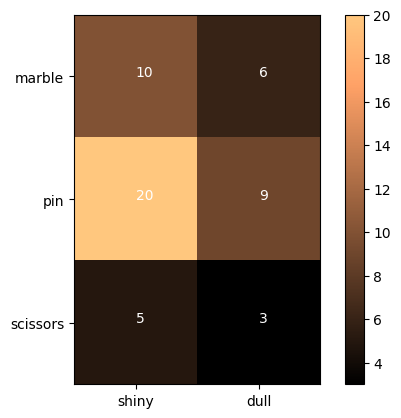

In [21]:
fig, ax = plt.subplots()
image = ax.imshow(observations_df, cmap = 'copper')
ax.set_xticks(np.arange(observations_df.shape[1]), labels = observations_df.columns)
ax.set_yticks(np.arange(observations_df.shape[0]), labels = observations_df.index)

for i, c in enumerate(observations):
    for j, r in enumerate(c):
        ax.text(j, i, r, color = 'w')

plt.colorbar(image)
plt.show()

### 2D functions

Finally, a quick intro into plotting 2D functions $z=f(x,y)$.

With 1D functions $y=f(x)$, we had to create "dense" values of $x$ and calculate the corresponding $y=f(x)$ value to display a smooth graph. We did this with [`numpy.linspace()`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html).

For 2D functions $z=f(x,y)$, we need to create a dense _mesh_ of $(x,y)$ value pairs on which we can calculate our function $z=f(x,y)$. For this, we can combine the outputs of [`numpy.linspace()`](https://numpy.org/doc/stable/reference/generated/numpy.linspace.html) with [`numpy.meshgrid()`](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html).

There are three main ways of plotting such an output:
- [`matplotlib.axes.Axes.contourf()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.contourf.html) draws filled contours of a function given with `X`, `Y`, `Z`. The next parameter is the number of levels.
- [`matplotlib.axes.Axes.contour()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.contour.html) draws contour lines of a function given with `X`, `Y`, `Z`. The next parameter is the number of levels.
- [`matplotlib.axes.Axes.imshow()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.imshow.html) display `Z` as an image, with some speecial considerations (see below)

Using [`matplotlib.axes.Axes.contourf()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.contourf.html) can sometimes look patchy, even for a large number of contour lines:

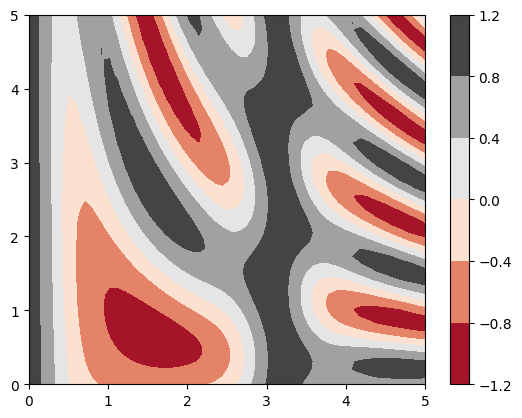

In [22]:
def f(x, y):
    return np.cos(x) ** 10 + np.sin(10 + y * x) * np.sin(x)

x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

fig, ax = plt.subplots()
# changing number of lines improves the visualisation, but is still patchy:
image = ax.contourf(X, Y, Z, 5, cmap = 'RdGy')

plt.colorbar(image)

plt.show()

For using [`matplotlib.axes.Axes.imshow()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.imshow.html) we must take care:
- to pass the min/max of x and y as the `extent` parameter
- to set the `origin` parmeter to `lower` (with images, the origin is usually in the upper-left corner)
- we can also pass the `interpolation` parameter for additional smoothing

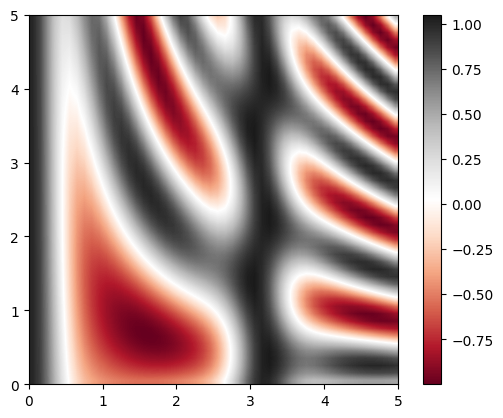

In [23]:
def f(x, y):
    return np.cos(x) ** 10 + np.sin(10 + y * x) * np.sin(x)

x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 50)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

#plt.contour(X, Y, Z, colors='black')
fig, ax = plt.subplots()
image = ax.imshow(Z, extent = [0, 5, 0, 5], origin='lower', cmap = 'RdGy', interpolation = 'bilinear')

plt.colorbar(image)
plt.show()

Finally, we show the output of [`matplotlib.axes.Axes.contour()`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.contour.html), displaying 3 distinct contour lines, overlaid over the image of the function.

To display the image with an opacity, we used the `alpha` parameter.

To display the level in text on the images, we used [`matplotlib.axes.Axes.clabel(contour_set)`](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.clabel.html).

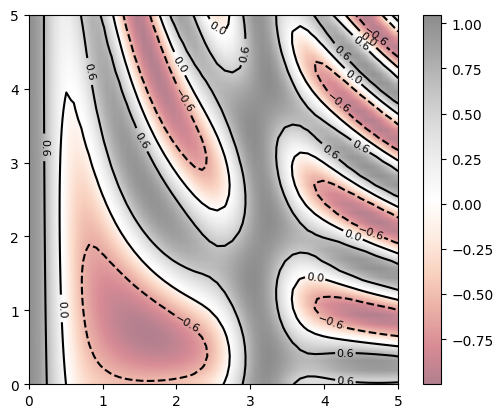

In [24]:
def f(x, y):
    return np.cos(x) ** 10 + np.sin(10 + y * x) * np.sin(x)

x = np.linspace(0, 5, 50)
y = np.linspace(0, 5, 40)

X, Y = np.meshgrid(x, y)
Z = f(X, Y)

#plt.contour(X, Y, Z, colors='black')
fig, ax = plt.subplots()
image = ax.imshow(Z, extent = [0, 5, 0, 5], origin='lower',
                  cmap = 'RdGy', interpolation = 'bilinear', alpha = 0.5)

contours = ax.contour(X, Y, Z, 3, colors='black')
ax.clabel(contours, fontsize=8)
plt.colorbar(image)
plt.show()

## ICT summary

I have stored the ICT scores in a file called _ict.csv_ (no IDs or other identifying information is included, just the scores), so we can perform some analysis and visualisation. First, we will read in the file into a [`DataFrame`](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html) -- it contains only a single data column called _score_.

In [25]:
ict_df = pd.read_csv('ict.csv', index_col='id')
ict_df.head(10)

,score
id,
0,50.0
1,30.0
2,30.0
3,90.0
4,60.0
5,NaN
6,40.0
7,60.0
8,70.0


Let us look at how many values we have, and also look at some missing values. This will tell us about how many students took the exam, and how many students (registered on BlackBoard) did not.

In [26]:
print(ict_df.isna().sum())
ict_df.dropna(inplace=True)
print(ict_df.isna().sum())
print(ict_df.info())

score    4
dtype: int64
score    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 0 to 33
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   30 non-null     float64
dtypes: float64(1)
memory usage: 480.0 bytes
None


We can see that 2 students (registered on BlackBoard) did not take the test -- we remove them from further analysis. Also, we can see that 43 students took the exam.

Then, let us look at the maximum and average score on the exam, as well as the standard deviation:

In [27]:
print(ict_df.score.max(), ict_df.score.mean(), ict_df.score.std())

100.0 64.0 18.30771459776188


To check how many students scored the maximum points on the exam, we can simply count the number of entries in the dataframe where this is true:

In [28]:
(ict_df.score == ict_df.score.max()).sum()

1

We can similarly check to see how many students achieved a passing grade:

In [29]:
(ict_df.score >= 50).sum()

25

Finally, I put all of this together in this informative summary, showing the percentage (and number) of students falling into each of the final grade ranges for the module:

[0. 0. 0. 2. 3. 4. 7. 5. 5. 4.]


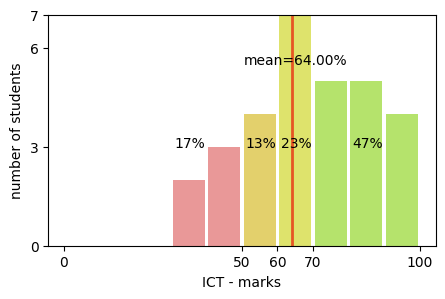

In [30]:
fig, ax = plt.subplots(1, 1, figsize=(5,3))
N, bins, patches = ax.hist(ict_df.score, bins=np.linspace(0, 100, 11), rwidth = 0.9)
print(N)
for i in range(0,5):
    patches[i].set_facecolor('#e99898')
patches[5].set_facecolor('#e3d06c')
patches[6].set_facecolor('#dee36c')
for i in range(7, len(patches)):
    patches[i].set_facecolor('#b5e36c')

ax.set_xticks([0,50,60,70,100])

marks = np.array([0, 0, 0, 0])
marks[0] = (ict_df.score < 50).sum()
marks[1] = ((ict_df.score >= 50) & (ict_df.score <60)).sum()
marks[2] = ((ict_df.score >= 60) & (ict_df.score <70)).sum()
marks[3] = (ict_df.score >= 70).sum()
total = marks.sum()
marks = marks.astype('float')/total
ax.text(31, 3, '{:0.0f}%'.format(marks[0]*100))
ax.text(51, 3, '{:0.0f}%'.format(marks[1]*100))
ax.text(61, 3, '{:0.0f}%'.format(marks[2]*100))
ax.text(81, 3, '{:0.0f}%'.format(marks[3]*100))

ax.set_xlabel("ICT - marks")
ax.set_ylabel("number of students")
ax.set_ylim([0,7])
ax.set_yticks([0, 3, 6, 7])

median = ict_df.score.sum()/total
ax.plot([median,median], [0,17], linewidth = 2, color='#e65524')
ax.text(50.5, 5.5, 'mean={:0.2f}%'.format(median))

plt.savefig('ICT.eps', bbox_inches='tight')

plt.show()

### Per question analysis

The following analysis was obtained through BlackBoard by analysing per-question data for each attempt at the test. We won't demonstrate how this works on your own exam data (due to reasons of privacy), but one day you may need to develop a tool to perform similar analysis

|Question | Question Type   | Average score |
| ------| ----------- | ----------- | 
| List comperhension    | Matching        | 9.67|
| Data types    | Multiple choice   | 8.67 |
| Function declaration    | True/False | 8.34 |
| Operators between different data types    | Multiple choice | 8.00 | 
| List comperhension    | Multiple choice | 7.34 
| Nested if statements    | Multiple choice | 7.00 |
| Classes (public attribute)    | Multiple choice | 6.00 |
| Recursion | Multiple choice | 4.67 |
| Classes (private attribute) | Fill in the blank | 3.00 |
| Reading from a file | Multiple Choice | 1.34 |

#### Recursion
##### Average score 4.67/10
**Recursion** is a powerful programming tool, often leading to simple definitions of functionality which would be much more difficult to implement otherwise.

The below code snippet defines a recursive function operating on lists. Given the function input given below, what will the output be?

Things to note:
- `my_list[1:-1]` removes the first and the last element of the list
- mind the inequality in the IF statement. If the list length is equal to 3, it will no longer be reduced

In [31]:
def rec_function(my_list):
   if len(my_list) > 3:
       return rec_function(my_list[1:-1])
   else:
       return my_list
 
nums = [1, 6, 3, 7, 3, 2]
print(rec_function(nums))

[3, 7]


#### Classes (private attribute)

##### Average score 3.00/10

When we decide to restrict access to a class instance attribute by **making it private**, sometimes we only want to restrict users from changing this attribute, while still allowing them to access it's value. This is usually achieved through _getter methods_, public class methods which return the value of the private attribute.

The below code snippet implements a simple User class, with a private instance attribute _ID_. To enable users to access, but not change the value of User _ID_, a getter method _get_ID_ has been set up. Complete the implementation of this method by filling in the value which needs to be returned by the return statement.

Things to note:
- you can see the _private attribute_ corresponding to _ID_ set up in the `__init__` method.

In [32]:
class User:
   def __init__(self, ID):
       assert(isinstance(ID, int))
       self.__ID = ID
   def get_ID(self):
       return 0 # 0 was shown as [Blank 1] in the test

user1 = User(1)
print(user1.get_ID)

<bound method User.get_ID of <__main__.User object at 0x7fefeaa23ad0>>


#### Reading from a file

##### Average score 1.34/10

Which lines of code will correctly read the third line from the file _"my_file.txt"_, completing the code snippet below? 

**Multiple answers may be correct**, and answers that also read the newline character are also considered correct.

In [33]:
with open("my_file.txt", "r") as f:
    line = f.readlines()[2]
print(line)

third line



In [34]:
with open("my_file.txt", "r") as f:
    line = f.readline(3)
print(line)

fir


In [35]:
with open("my_file.txt", "r") as f:
    for i in range(3): line = f.readline()
print(line)

third line



In [36]:
with open("my_file.txt", "r") as f:
    line = f.read().split('\n')[2]
print(line)

third line
